In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def gen_1Dlabel(para, cov,x='R', d=[5,5,3,3], n=[1,1]):
    f = []
    for i in d:
        f.append('{:.'+str(i)+'e}')
    return (f[0]+'({})*'+ x + ' - '+f[2]+'({})').format(para[0],f[1].format(np.sqrt(cov[0][0]))[:n[0]], 
                                                        para[1],f[3].format(np.sqrt(cov[1][1]))[:n[1]])

0.015272646455571439 0.0023546087154408817 -0.9947344999797348 1.7655486624511156
1.2684922305291894e-05 1.9556550792698354e-06
0.9999919658420864


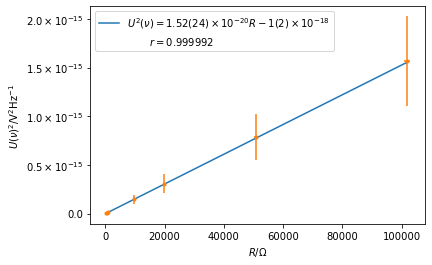

In [102]:
r = np.array([101700,50800,19700,9760,980,507,199])
usq = np.array([1568.,784.2,307.6,146.5,13.45,6.245,2.255])
usq_err = np.array([459.,235.,96.2,48.7,6.25,3.19,1.85])

def line(x,a,b):
    return x*a+b

lpopt, lpcov = curve_fit(line,r,usq,sigma=usq_err+0.01*0.01527*r,absolute_sigma=True)

plt.plot(r,lpopt[0]*r+lpopt[1],label=r'$U^2(\nu)=1.52(24)\times10^{-20}R-1(2)\times10^{-18}$')
plt.plot([-3],[-3],'w',label='       $r = 0.999992$')
plt.errorbar(r,usq,xerr=r*0.01,yerr=usq_err,ls='',fmt='.')


print(lpopt[0],np.sqrt(lpcov[0][0]),lpopt[1],np.sqrt(lpcov[1][1]))
print(lpopt[0]/4/301,np.sqrt(lpcov[0][0])/4/301)

rbar = np.average(r)
ubar = np.average(usq)
correlation = np.dot(r-rbar,usq-ubar)/np.sqrt(np.dot(r-rbar,r-rbar)*np.dot(usq-ubar,usq-ubar))
print(correlation)
plt.yticks(range(0,2500,500),['0.0',r'$0.5\times10^{-15}$',r'$1.0\times10^{-15}$',r'$1.5\times10^{-15}$',r'$2.0\times10^{-15}$'])
plt.xlabel(r'$R/\Omega$')
plt.ylabel(r'$U(\nu)^2/$V$^2$Hz$^{-1}$')
plt.legend(loc='upper left')
plt.savefig('pic/ur.pdf')

272.58581399049984 60.43071374576026 0.03892699061056984 0.3464605477370821
136.29290699524992 30.21535687288013
0.9982931943348526


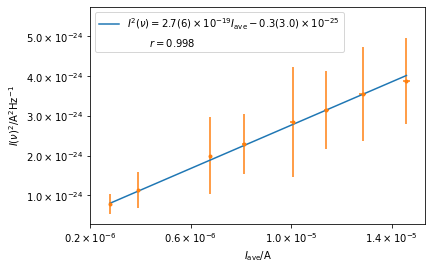

In [104]:
I = np.array([1.42,1.25,1.11,0.98,0.79,0.66,0.38,0.27])/97.3
isq = np.array([3.879,3.557,3.157,2.845,2.290,1.999,1.125,0.78])
isq_err = np.array([1.09,1.19,0.98,1.38,0.756,0.964,0.456,0.261])

def line(x,a,b):
    return x*a+b

lipopt, lipcov = curve_fit(line,I,isq,sigma=isq_err,absolute_sigma=True)

plt.plot(I,lipopt[0]*I+lipopt[1],label=r'$I^2(\nu)=2.7(6)\times10^{-19}I_{\rm{ave}}-0.3(3.0)\times10^{-25}$')
plt.plot([0.006],[5.5],'w',label='       $r = 0.998$')
plt.errorbar(I,isq,xerr=I*0.01,yerr=isq_err,ls='',fmt='.')


print(lipopt[0],np.sqrt(lipcov[0][0]),lipopt[1],np.sqrt(lipcov[1][1]))
print(lipopt[0]/2,np.sqrt(lipcov[0][0])/2)

ibar = np.average(I)
iqbar = np.average(isq)
correlation = np.dot(I-ibar,isq-iqbar)/np.sqrt(np.dot(I-ibar,I-ibar)*np.dot(isq-iqbar,isq-iqbar))
print(correlation)
plt.xticks([0.002,0.006,0.01,0.014],[r'$0.2\times10^{-6}$',r'$0.6\times10^{-6}$',r'$1.0\times10^{-5}$',r'$1.4\times10^{-5}$'])
plt.yticks(range(1,6,1),[r'$1.0\times10^{-24}$',r'$2.0\times10^{-24}$',r'$3.0\times10^{-24}$', r'$4.0\times10^{-24}$',r'$5.0\times10^{-24}$'])
plt.xlabel(r'$I_{\rm{ave}}/$A')
plt.ylabel(r'$I(\nu)^2/$A$^2$Hz$^{-1}$')
plt.legend(loc='upper left')
plt.savefig('pic/ii.pdf')